In [1]:
import pandas as pd
from relative_path import TRACK_DATA, ARTIST_DATA

from pandas import DataFrame, Series
from typing import List, Dict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Standard

In [2]:
df_tracks =     pd.read_parquet(TRACK_DATA)
df_artists =    pd.read_parquet(ARTIST_DATA)

In [3]:
df_tracks.sort_values(by="popularity", ascending=False, inplace=True)
df_tracks.reset_index(drop=True, inplace=True)

In [4]:
# Checking and processing the DATATYPES. 
df_tracks["dates"] = pd.to_datetime(df_tracks["release_date"])
df_tracks["release_date"] = pd.to_datetime(df_tracks["release_date"])
df_tracks["year"]=df_tracks["release_date"].dt.year

df_tracks.drop(['release_date', 'dates'], axis=1, inplace=True)

In [ ]:
class VisualizeMissing:
    def __init__(
            self, 
            input_df:DataFrame, 
            name:str, export:bool=False, 
            process_null:bool=False, 
            process_zero:bool=False
        ) -> None:
        
        self.df:DataFrame = input_df.copy(deep=True)
        self._process_data(replace_null=process_null, replace_zero=process_zero)
        self.name = name.title()
        
        self._export = export
        self._fontsize = 16
        
        self._label_rotation:int = 90
        self._figsize:int = (30,15)
        self._about:str = "Visualize Missing, NA, 0 values"

In [49]:
class VisualizeRelational:
    """ Visualize Relational Plot """
    def __init__(
        self, 
        input_df:DataFrame, 
        name:str,
        x:str,
        y:str,
        export:bool=False
    ) -> None:
        
        self.df = input_df.copy()
        self.name = name.title()
        
        self.x = x
        self.y = y
        
        self._export = export
        self._fontsize = 16

        self._LABEL_ROTATION:int = 90
        self._FIGSIZE:int = (30,15)
        self._ASPECT:int = 3
        self._PALETTE = "rocket"
        
    def BoxPlot(self):
        fig = sns.catplot(
            x=self.x, 
            y=self.y, 
            data=self.df, 
            kind="box", 
            aspect=self._ASPECT, 
            palette=self._PALETTE
        )
        fig.set_xticklabels(rotation=90)
        fig.set(title=self.name)
        plt.show()
        
    def LinePlot(self):
        fig = sns.relplot(
            x=self.x, 
            y=self.y, 
            data=self.df, 
            kind="line",
            ci="sd",
            aspect=self._ASPECT,
            palette=self._PALETTE
        )
        fig.set(title=self.name)
        plt.show()

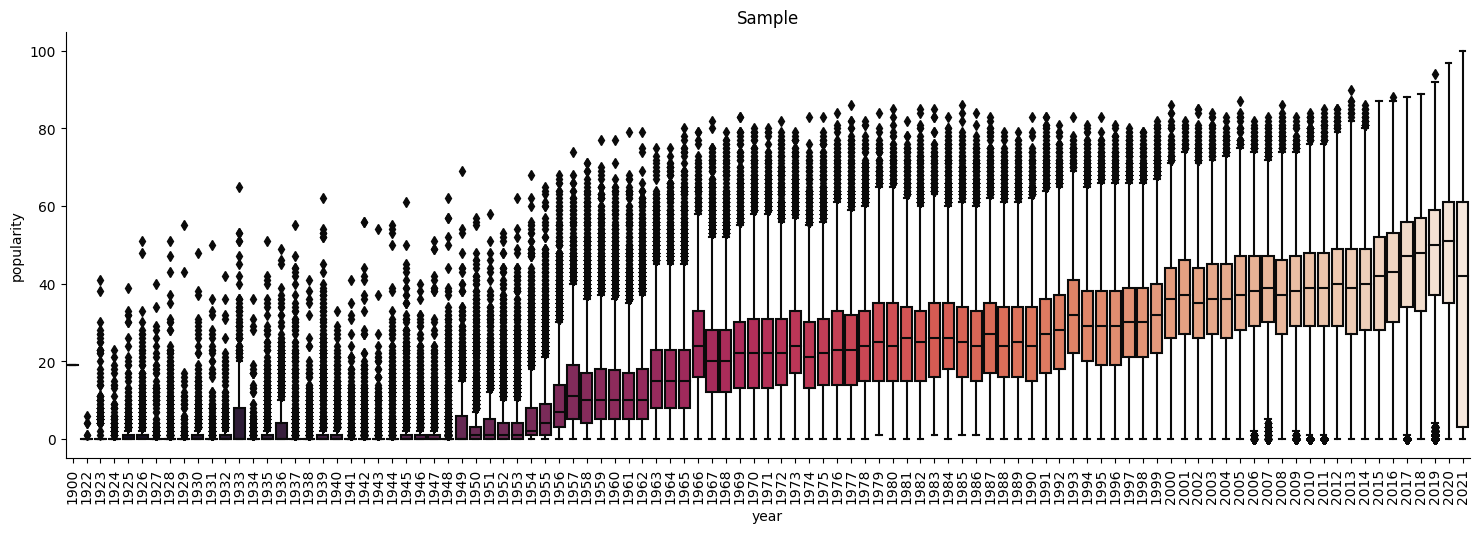

In [50]:
sample = VisualizeRelational(input_df=df_tracks, name="Sample", x="year", y="popularity")
sample.BoxPlot()

/var/folders/zb/r6zwt9xn6dgfrg3kzcgyjgtc0000gn/T/ipykernel_12340/1183397529.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.relplot(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


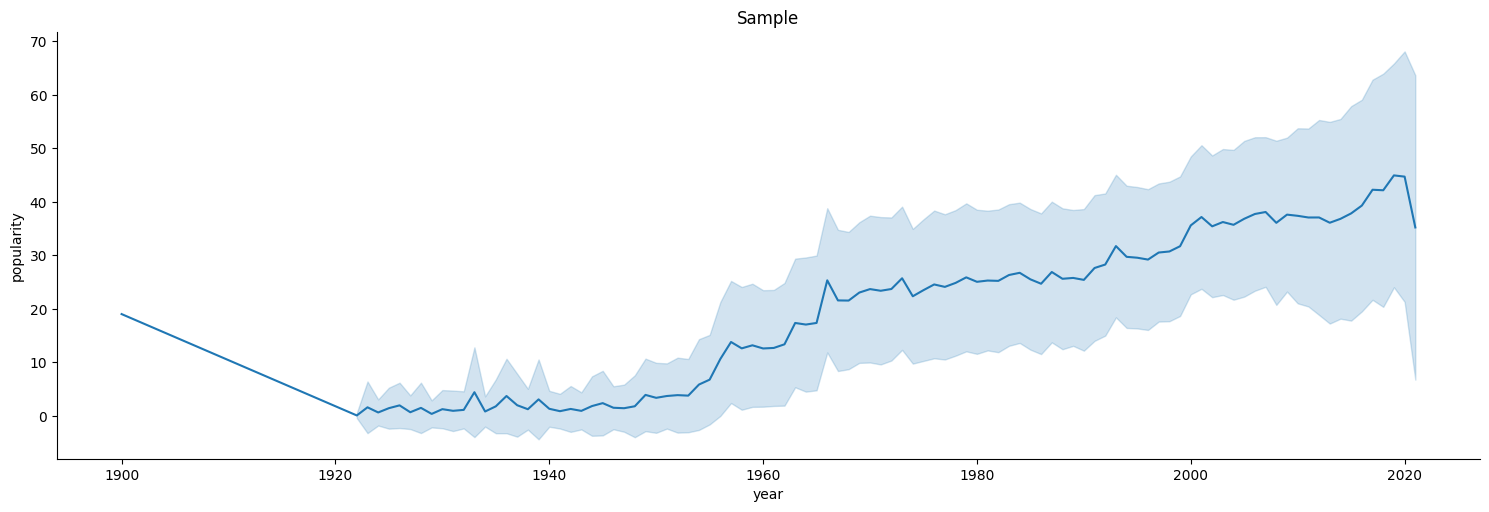

In [51]:
sample.LinePlot()

In [4]:
### Track Dataframe
# Track Popularity over time / year - distribution, boxplot. (Render the top 10, 100 and 1000, )
# Extract - Top solo artists vs Top various artists

### Artists Dataframe
# Artist Popularity over Artist Followers
# Frequency of genres, relative to the top artist. (Top 10% and Top 25%, Top 10 and 100)


###  Combination of Track and Artists Dataframe
# Track Popularity over Total Artists Followers, Track Popularity over Average Artists Popularity